In [1]:
from os import listdir
from os.path import isfile, join
import numpy as np
import cv2

In [2]:
#Loading images into arrays

mypath = '/Users/jasleenkaur/Desktop/Masters/Spring 2022/Image Analysis/Project/Cancerous cell smears/'
cellFiles = [f for f in listdir(mypath) if (isfile(join(mypath,f))) & (not f.startswith('.'))]
originalImages = np.empty(len(cellFiles),dtype=object)
grayscaleImages = np.empty(len(cellFiles),dtype=object)

for n in range(0,len(cellFiles)):
    originalImages[n] = cv2.imread(join(mypath,cellFiles[n]))
    grayscaleImages[n] = cv2.imread(join(mypath,cellFiles[n]), 0)
    

print(len(cellFiles))

#originalImages[1].size, originalImages[1].shape, originalImages[1].ndim
#grayscaleImages[1].size, grayscaleImages[1].shape, grayscaleImages[1].ndim
#cv2.imshow('Sample image', images[1])
#cv2.waitKey(0)
#cv2.destroyAllWindows()

499


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

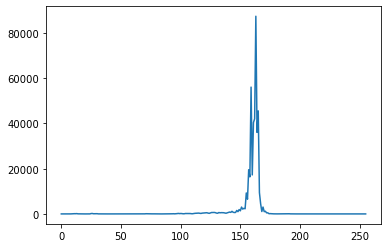

In [29]:
#Histogram calculation for one image (grayscale)

import cv2
import random
from matplotlib import pyplot as plt

def histogramCalc(image):
    (height,width) = image.shape
    hist = np.zeros(256)

    for i in range(width):
        for j in range(height):
            hist[image[j,i]] += 1
    return hist
            
image = cv2.imread("/Users/jasleenkaur/Desktop/Masters/Spring 2022/Image Analysis/Project/Cancerous cell smears/cyl01.bmp", 0)
plt.plot(histogramCalc(image))
plt.plot


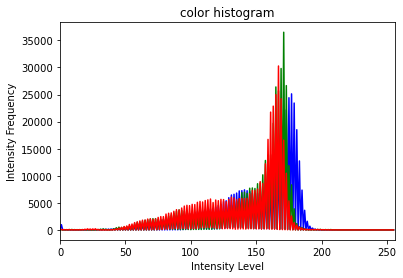

In [36]:
#Histogram calculation for one image (rgb)

import cv2
import random
from matplotlib import pyplot as plt

def histogramCalc(image):
    
    height, width, ch = image.shape
    hist = np.zeros([256, ch], np.int32)
    
    for i in range(0, height):
        for j in range(0, width):
            for k in range(0, ch):
                hist[image[i,j,k], k] += 1
    return hist

def plottingHistograms(histogram):
    
    plt.figure()
    plt.title("color histogram")
    plt.xlabel("Intensity Level")
    plt.ylabel("Intensity Frequency")
    plt.xlim([0,256])
    plt.plot(histogram[:,0],'b')
    plt.plot(histogram[:,1],'g')
    plt.plot(histogram[:,2],'r')
    plt.savefig("/Users/jasleenkaur/Desktop/Masters/Spring 2022/Image Analysis/Project/Histograms/Color_Histogram2.jpg")


image = cv2.imread("/Users/jasleenkaur/Desktop/Masters/Spring 2022/Image Analysis/Project/Cancerous cell smears/cyl02.bmp")
#plt.plot(histogramCalc(image))
histogram = histogramCalc(image)
plottingHistograms(histogram)





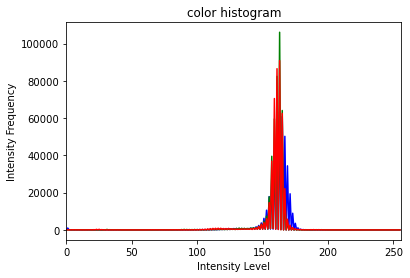

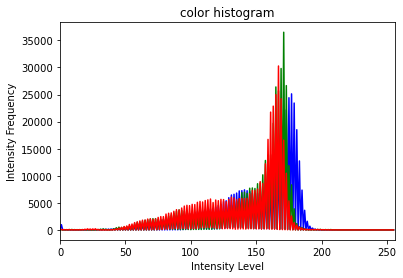

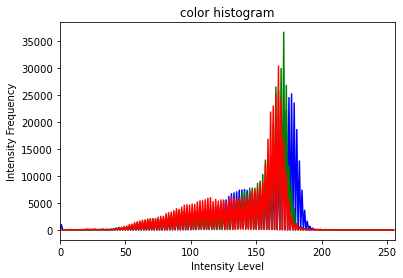

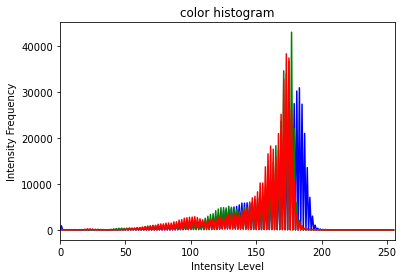

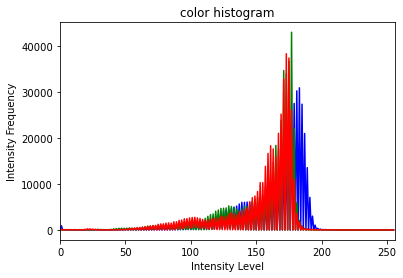

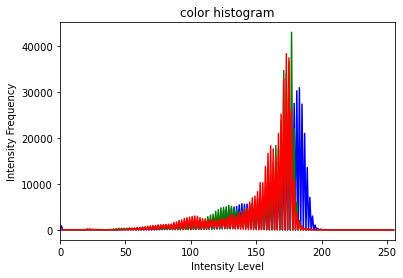

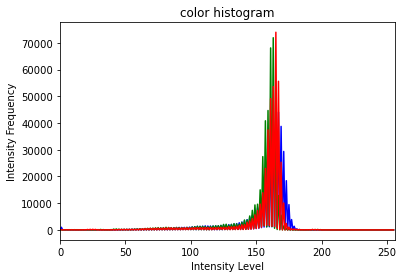

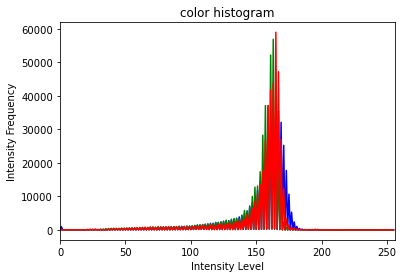

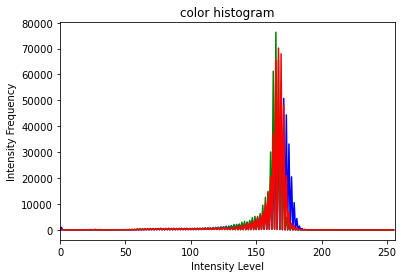

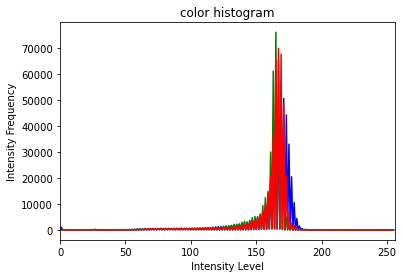

In [42]:
#Histogram calculation for multiple images (rgb)

import cv2
import random
from matplotlib import pyplot as plt

def histogramCalc(histogramCalcArray):
    cntr = 1
    for eachImage in range(len(histogramCalcArray)):
        height, width, ch = histogramCalcArray[eachImage].shape
        hist = np.zeros([256, ch], np.int32)
    
        for i in range(0, height):
            for j in range(0, width):
                for k in range(0, ch):
                    hist[histogramCalcArray[eachImage][i,j,k], k] += 1
        
        plottingHistograms(hist, cntr)
        cntr += 1

    return hist

def plottingHistograms(histogram, cntr):
    
    plt.figure()
    plt.title("color histogram")
    plt.xlabel("Intensity Level")
    plt.ylabel("Intensity Frequency")
    plt.xlim([0,256])
    plt.plot(histogram[:,0],'b')
    plt.plot(histogram[:,1],'g')
    plt.plot(histogram[:,2],'r')
    plt.savefig("/Users/jasleenkaur/Desktop/Masters/Spring 2022/Image Analysis/Project/Histograms/ColorHistogram" + str(cntr) + ".jpg")

histogramCalcArray = np.copy(originalImages[:10])
histogram = histogramCalc(histogramCalcArray)


